# Our first machine learning model: Logistic Regression

In [1]:
# Import our libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Packages loaded ...")

Packages loaded ...


# Import and inspect the Titanic dataset.
* Load the titanic data set into a pandas dataframe.

In [2]:
# Load the titanic data set into a pandas dataframe.
df = pd.read_csv("./data/titanic.csv")
print("DF Loaded ...")

DF Loaded ...


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>

# Identify which columns have null values. 
Inspect which varibles may be good / not good for using as features based on null values. 


In [3]:
# Identify which columns have null values. 
columns_with_na = df.columns[df.isna().any()].tolist()
print(f"Columns with na: {columns_with_na}")

Columns with na: ['age', 'cabin', 'embarked']


# Check to see if our data has any duplicate rows.
If so, remove the duplicates.

In [4]:
# Check to see if our data has any duplicate rows.

# Obtain columns with duplicates similar to how we obtained columns with null values
columns_with_duplicates = [col for col in df.columns if df[col].duplicated().any()]

print(columns_with_duplicates)

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


In [5]:
print(f"Shape of df before removing duplicates: {df.shape}")

Shape of df before removing duplicates: (891, 12)


In [6]:
df_no_duplicates = df.drop_duplicates(subset=columns_with_duplicates)

In [7]:
print(f"Shape of df after removing duplicatesz: {df_no_duplicates}")

Shape of df after removing duplicatesz:      passengerid  survived  pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  name     sex   age  sibsp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                           

# Use sns.pariplot to visualize.
* Set the hue='survived'.

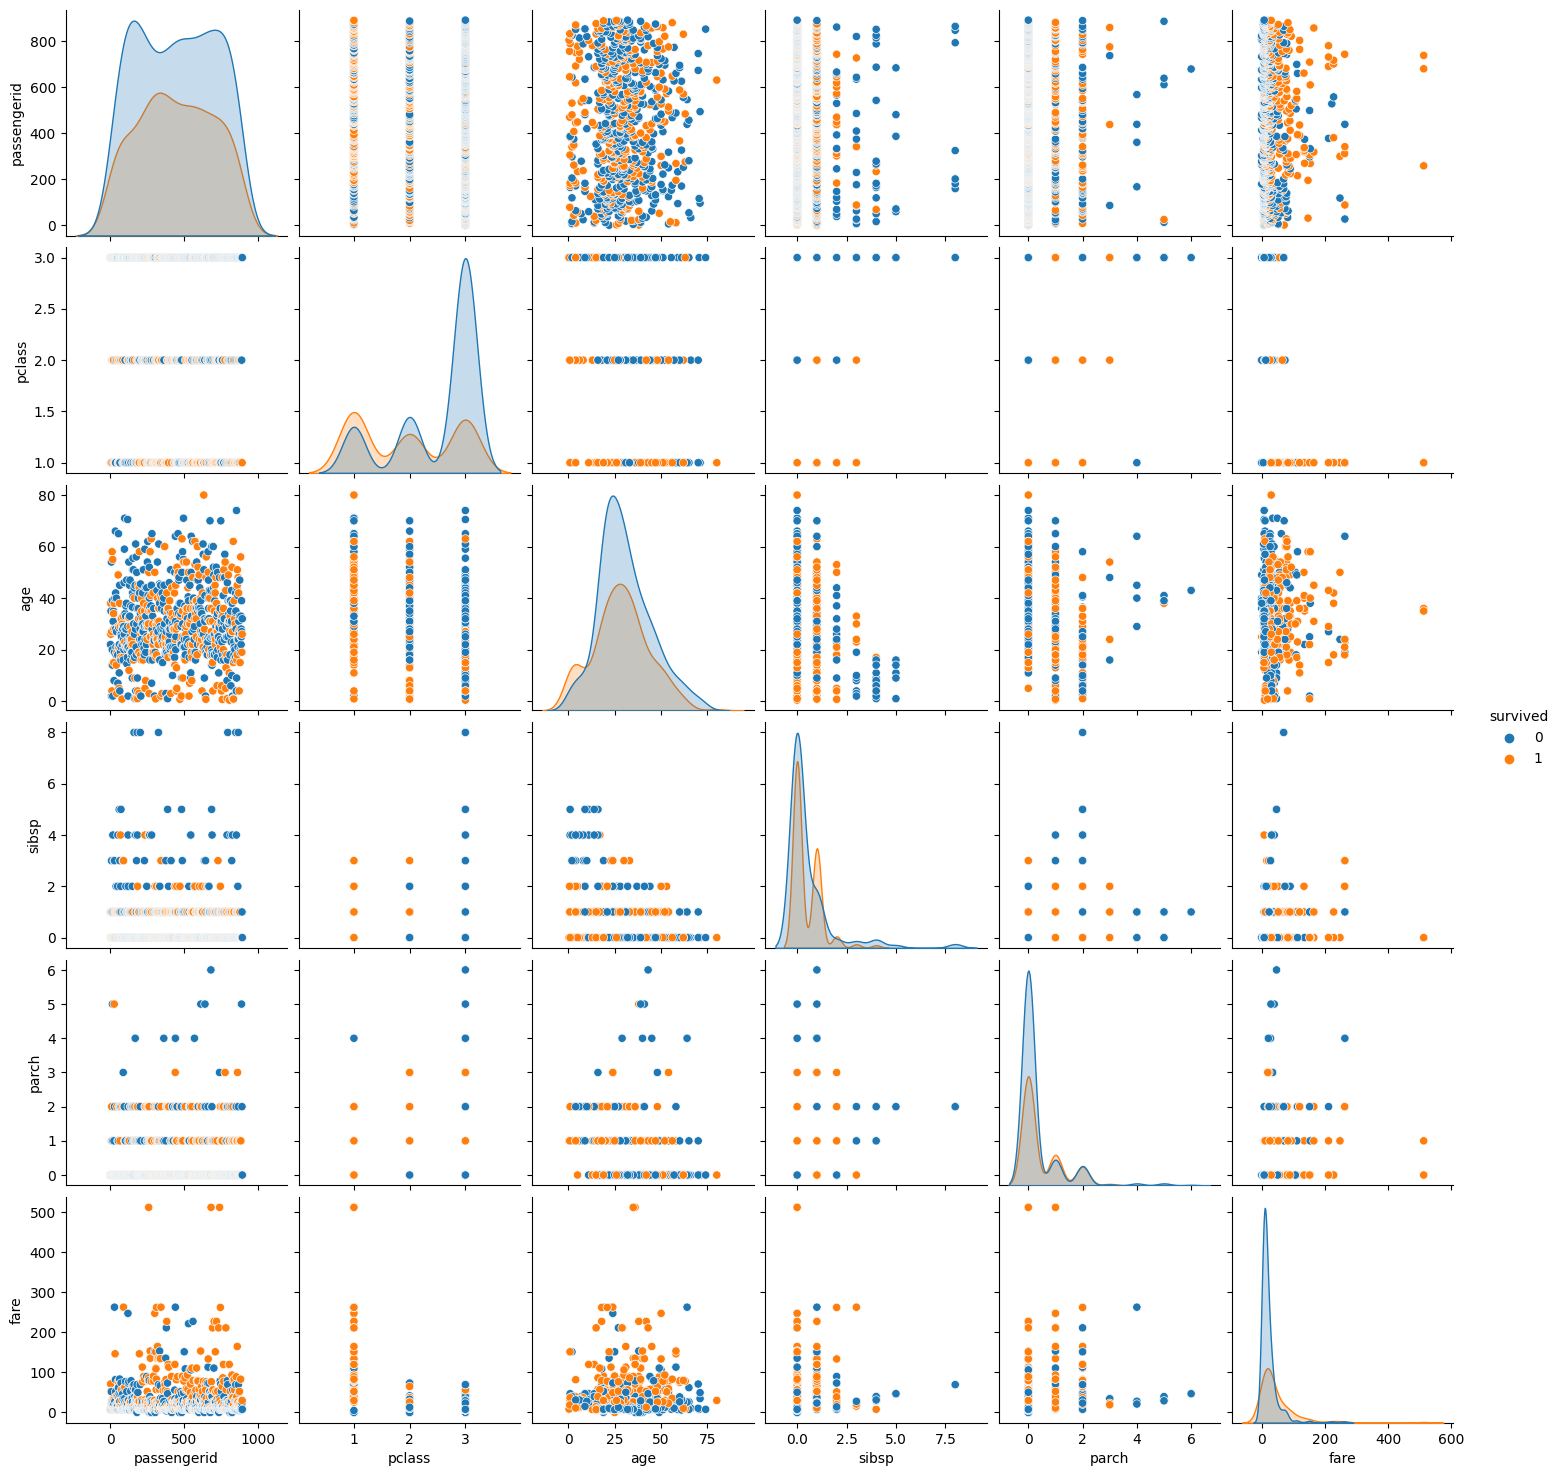

In [8]:
# Use sns.pariplot to visualize.
sns.pairplot(df, hue='survived')

# Feature Engineering
For your first model, only include use the `fare` and `sex` as features.
* Convert the `sex` feature to a continuous value by using `pd.get_dummies()`.
* Drop the `sex_female` column as it is the identical inverse of `sex_male`. 
    * Hint, you can use `drop_first=True` in the `pd.get_dummies()` function to have this done automatically.
* Create a `selected_features` variable that is a list of `fare` and `sex_male`.  
* Define your X and y variables.
    * `X` is your selected features
    * `y` is your target features (survived). 
* Split your data into training and testing groups by using `train_test_split()`
    * __IMPORTANT: In `train_test_split` set `random_state=45`, so when you make another model, you can run it on the same random split of data.__

In [9]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [10]:
df_dummified = pd.get_dummies(df, columns=['sex'])

In [11]:
df_dummified

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_female,sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


In [12]:
# Create the 'sex' column where 0 -> female and 1 -> male
df_dummified['sex'] = df_dummified['sex_male']

# Drop the original dummified columns
df_dummified = df_dummified.drop(columns=['sex_female', 'sex_male'])

In [13]:
df_dummified

,passengerid,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1


# Select our features 
   * only include use the `fare` and `sex_male` as features for this model.

In [14]:
# Select our features
selected_features = ['fare', 'sex']

# Set X to be the features we are going to use.
X = df_dummified[selected_features]

# Set y to be our target variable. 
y = df_dummified['survived']

# Split our data into the testing and training groups. 

In [15]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

X_train

(668, 2) (223, 2)


,fare,sex
298,30.5000,1
884,7.0500,1
247,14.5000,0
478,7.5208,1
305,151.5500,1
...,...,...
106,7.6500,0
270,31.0000,1
860,14.1083,1
435,120.0000,0


# Build and train your model
* Initialize an empty Logistic Regression model. 
* Fit your model with your training data. 
* Predict the values of your testing data

In [16]:
# Initalize our model
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model Instantiated and fitted ...")


Model Instantiated and fitted ...


# Evaluate your model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
    * Hint, sklearn provides helper functions for this.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?

In [17]:
# 1. Make predictions of your test data and save them as `y_pred`. 
y_pred = model.predict(X_test)
print("Predictions saved ....")

Predictions saved ....


In [18]:
# 2. Calculate and print the accuracy, precision, recall, and f1 scores of your model.

# Calculate our accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision = precision_score(y_test, y_pred)

# Calculate our recall score
recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.771300
Precision Score: 0.715909
Recall Score: 0.707865
F1 Score 0.711864


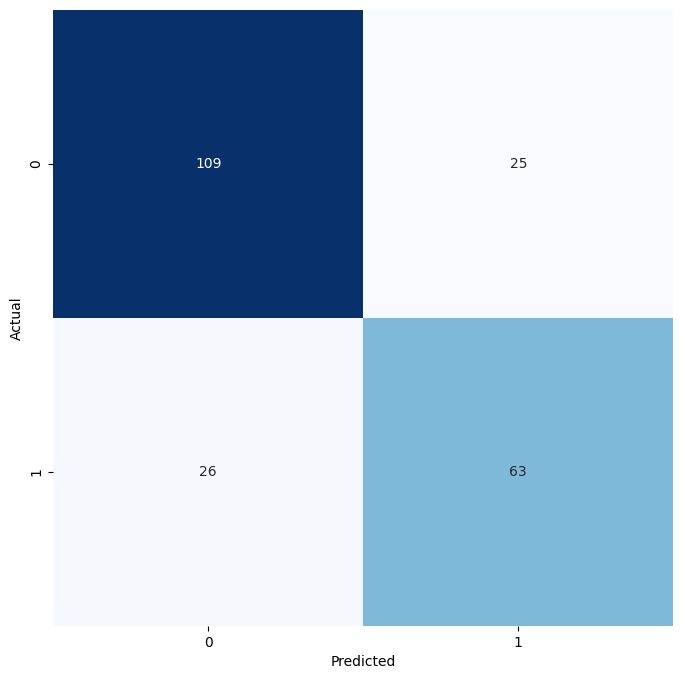

In [19]:
# 1. Plot a confusion matrix of your predicted results. 
cm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [20]:
# How many True Positives and True Negatives did your model get?
print('??? True Negatives and ??? True Positives')
TN, FP, FN, TP = cm.ravel()
print(f"True Positive: {TP}")
print(f"True Negative : {TN}")


??? True Negatives and ??? True Positives
True Positive: 63
True Negative : 109


# Create another model, call this `model_2`.  This time also include the p_class and embarked features. 
1. Run `pd.get_dummies()` on pclass and embarked of your DataFrame.
1. Update your `selected_features` to include the new pclass, embarked, sibsp, and parch features.
1. Define your `X` and `y` variables.
1. Break your data into training and testing groups.
    * __IMPORTANT, In `train_test_split` set `random_state=45` so we will be using the same data rows as our first model__.
1. Initialize a new model, call this one `model_2`
1. Fit / Train your new model
1. Make predictions of your test data and save them as `y_pred`. 
1. Calculate and print the accuracy, precision, recall, and f1 scores of your model.
1. Plot the confusion matrix of your predicted results. 
    * How many True Positives and True Negatives did your model get?
    
Compare the results to your first model. Which model had a better accuracy, recall, precision, and f1 score.

In [21]:
df_dummified.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'sex'],
      dtype='object')

In [22]:
df_dummified[selected_features]

,fare,sex
0,7.2500,1
1,71.2833,0
2,7.9250,0
3,53.1000,0
4,8.0500,1
...,...,...
886,13.0000,1
887,30.0000,0
888,23.4500,0
889,30.0000,1


In [23]:
# Update your `selected_features` to include the new pclass and embarked features. 
selected_features = ['pclass', 'age', 'sibsp', 'parch', 'fare',  'sex']
# Define your X and y variables
df_dummified_clean = df_dummified.dropna()

X = df_dummified_clean[selected_features] 
y = df_dummified_clean['survived']

# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
# Print the length and width of our testing data.
print(X_train.shape, X_test.shape)

(137, 6) (46, 6)


Accuracy Score: 0.695652
Precision Score: 0.750000
Recall Score: 0.750000
F1 Score 0.750000


Text(70.72222222222221, 0.5, 'Actual')

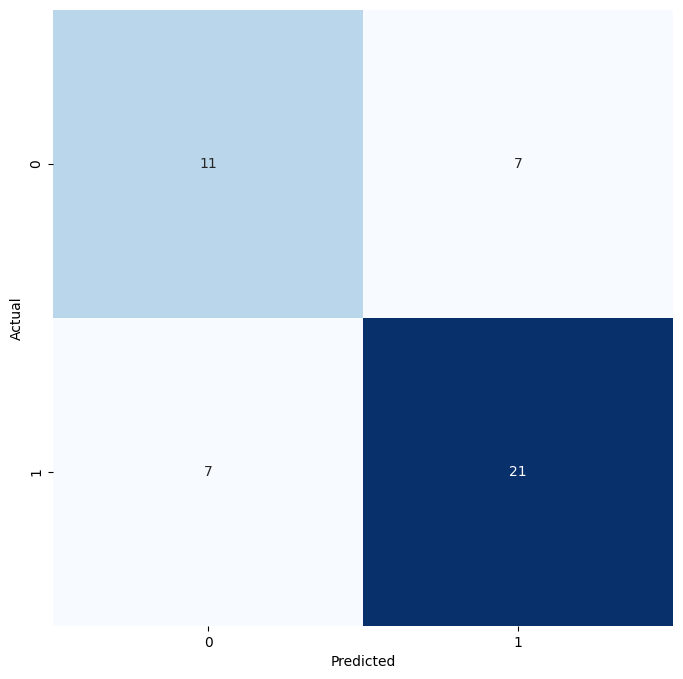

In [24]:
# Initalize our model_2
model_2 = LogisticRegression()

# Fit / Train our model using our training data.
model_2.fit(X_train, y_train)
# Make new predicitions using our testing data. 
y_pred = model_2.predict(X_test)

# Calculate our accuracy
accuracy_2 = accuracy_score(y_test, y_pred)

# Calculate our precision score
precision_2 = precision_score(y_test, y_pred)

# Calculate our recall score
recall_2 = recall_score(y_test, y_pred)

# Calculate your f1-score
f1_2 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_2)
print("Precision Score: %f" % precision_2)
print("Recall Score: %f" % recall_2)
print('F1 Score %f' % f1_2)

cm = confusion_matrix(y_test, y_pred)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')


# EXTRA CREDIT 1. 
* Use age as a feature. 
* How will you fill the null values?
    * Hint, use `df.age.fillna(???)`
* Make a new feature that 'traveled_alone'.  The sibsp and parch contain the amout of people they are traveling with. Mark everyone that has no sibsp or parch as traveled alone set to 1 and everyone else set to 0. 
    * Once you have this traveled_alone column, you dont need to use the the sibsp and parch cols in your model.

In [25]:


# Run pd.get_dummies on sex, pclass, and embarked of your DataFrame.


# Fill null age values with mean age.


# Create new traveled_alone feature


# Update your `selected_features` to include the new traveled alone and age


# Define your X and y variables


# Split our data into testing and training.
# Remeber to use the same random state as you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


# Initalize our model
model_3 = LogisticRegression()

# Fit / Train our model using our training data.

# Make new predicitions using our testing data. 


# Calculate our accuracy
accuracy_3 = 

# Calculate our precision score
precision_3 = 

# Calculate our recall score
recall_3 = 

# Calculate your f1-score
f1_3 = 

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy_3)
print("Precision Score: %f" % precision_3)
print("Recall Score: %f" % recall_3)
print('F1 Score %f' % f1_3)

# Plot your confusion matrix.
fig = plt.figure(figsize=(8,8))
plt.xlabel('Predicted')
plt.ylabel('Actual');

SyntaxError: invalid syntax (2120785277.py, line 30)

# EXTRA CREDIT 2:  

Use stats models to create a summary report.  Interpret the results. 